In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

**About this file**

Ссылка на каггл: https://www.kaggle.com/datasets/adilshamim8/education-and-career-success

- Student_ID

A unique identifier assigned to each student in the dataset.

- Age

The age of the student, ranging from 18 to 30 years old.

- Gender

The gender of the student, which can be Male, Female, or Other.

- High_School_GPA

The student's Grade Point Average (GPA) from high school, measured on a 4.0 scale.

- SAT_Score

The student's SAT standardized test score, ranging between 900 and 1600.

- University_Ranking

The ranking of the university attended by the student, ranging from 1 (highest) to 1000 (lowest).

- University_GPA

The GPA obtained by the student during university education, measured on a 4.0 scale.

- Field_of_Study

The student's major or discipline, such as Computer Science, Medicine, Business, Engineering, Arts, Law, or Mathematics.

- Internships_Completed

The number of internships completed by the student during their academic journey, ranging from 0 to 4.

- Projects_Completed

The number of academic or personal projects completed by the student, ranging from 0 to 9.


In [2]:
#Загружаем датасет
df = pd.read_csv('/content/education_career_success.csv')

In [ ]:
#Посмотрим на первые строки датасета
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [ ]:
# выведем описательные статистики для количественной непрерывной переменной в интересующем нас диапазоне переменных
df[['Gender', 'Starting_Salary', 'Field_of_Study', 'Entrepreneurship']].describe()

,Starting_Salary
count,5000.000000
mean,50563.540000
std,14494.958207
min,25000.000000
25%,40200.000000
50%,50300.000000
75%,60500.000000
max,101000.000000


Цель: исследовать, влияет ли каким-либо образом пол человека на его достижения в учебе и в последствии в работы.

In [ ]:
# Подсчёт количества по полу
gender_counts = df['Gender'].value_counts()

# Вывод результатов
print("Распределение по полу:")
print(gender_counts)

Распределение по полу:
Gender
Male      2458
Female    2350
Other      192
Name: count, dtype: int64


In [ ]:
# информация о типах данных, кол-ве нуль-значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [ ]:
#дополнительно выведем количество пропущенных значений (NaN) в каждом столбце
print("Количество пропущенных значений (NaN) в каждом столбце:")
print(df.isna().sum())

Количество пропущенных значений (NaN) в каждом столбце:
Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64


Можно считать, что у нас равного кол-ва выборки по мужчинам и женщинам

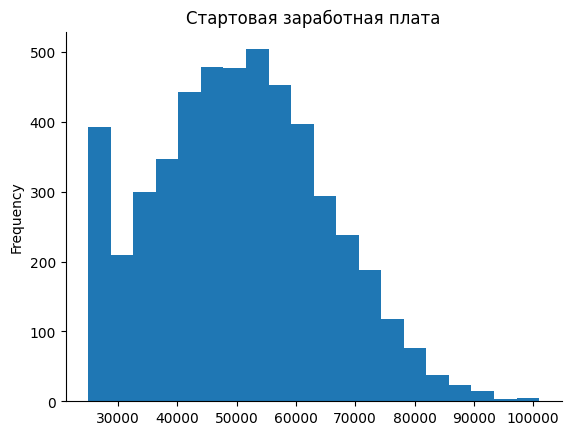

In [ ]:
# Визуализируем распределение Starting_Salary - целевой переменной
# @title Starting_Salary

from matplotlib import pyplot as plt
df['Starting_Salary'].plot(kind='hist', bins=20, title='Стартовая заработная плата')
plt.gca().spines[['top', 'right',]].set_visible(False)

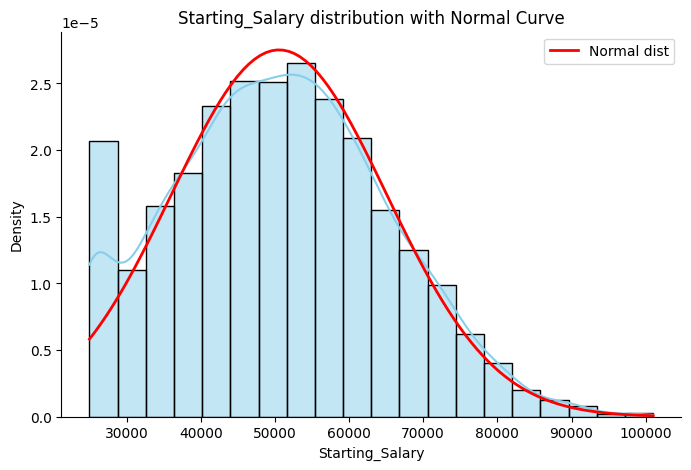

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

data = df_new['Starting_Salary']

plt.figure(figsize=(8,5))

# 1. Гистограмма с KDE
sns.histplot(data, bins=20, kde=True, color='skyblue', stat='density')

# 2. Параметры нормального распределения
mu, std = data.mean(), data.std()

# 3. Построение нормальной кривой
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal dist')

# Оформление графика
plt.title('Starting_Salary distribution with Normal Curve')
plt.xlabel('Starting_Salary')
plt.ylabel('Density')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


In [ ]:
# проведем проверку на нормальность для Starting_Salary
st.shapiro(df.Starting_Salary)

ShapiroResult(statistic=0.9868569074957424, pvalue=3.484858034969699e-21)

Нулевая гипотеза теста Шапиро–Уилка: данные распределены нормально.

Маленькое p-value (< 0.05) означает отклонение нулевой гипотезы.

Несмотря на statistic близкий к 1, такое маленькое p-value говорит, что распределение статистически значимо отличается от нормального Starting_Salary.

In [ ]:
# расчет Спирмена для выявления корреляции между Job_Offers и Starting_Salary
st.spearmanr(df.Job_Offers, df.Starting_Salary)
# В R все-таки приняли решение в пользу Kendall

SignificanceResult(statistic=-0.03572676532191141, pvalue=0.011522550627789497)

Job_Offers: целочисленная переменная от 0 до 5 — порядковая (дискретная), можно рассматривать как ранговую.

Starting_Salary: непрерывная числовая переменная — не обязательно нормально распределённая.

Корреляция Спирмена (spearmanr) — отличный выбор, когда:

хотя бы одна переменная не является нормально распределённой

одна или обе переменные — ранговые или порядковые

возможна не-линейная, но монотонная связь между переменными

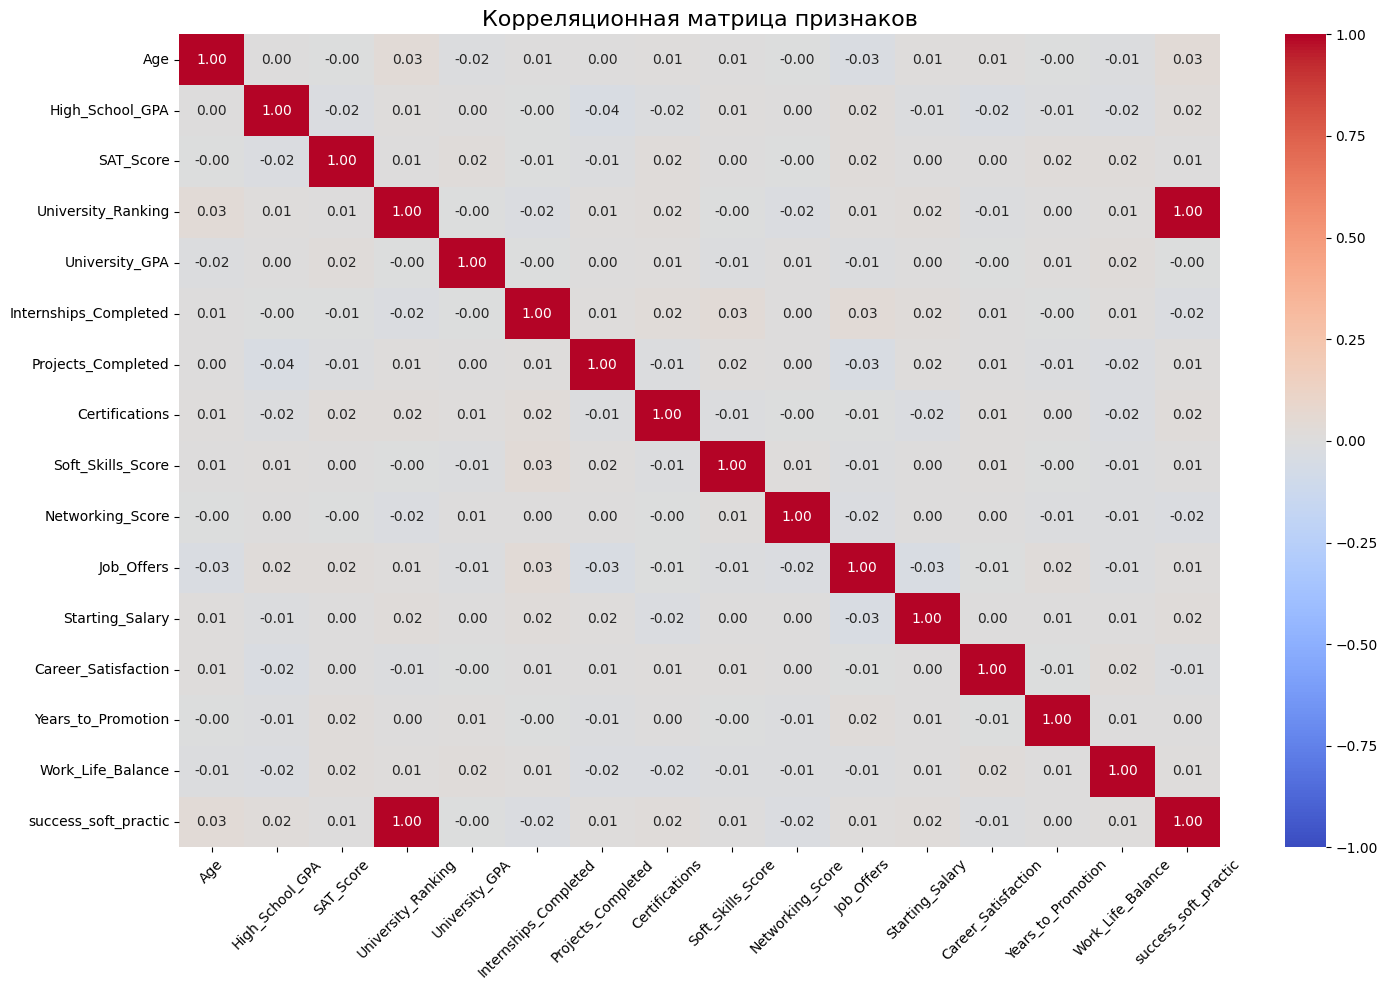

In [ ]:
# Построим корреляционную матрицу по Пирсону (базовую) признаков, чтобы в целом понимать, стоит ли дальше двигаться в строну
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Вычисляем корреляционную матрицу только по числовым столбцам
correlation_matrix = df.corr(numeric_only=True)

# Строим тепловую карту с подписями значений корреляции
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Корреляционная матрица признаков", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

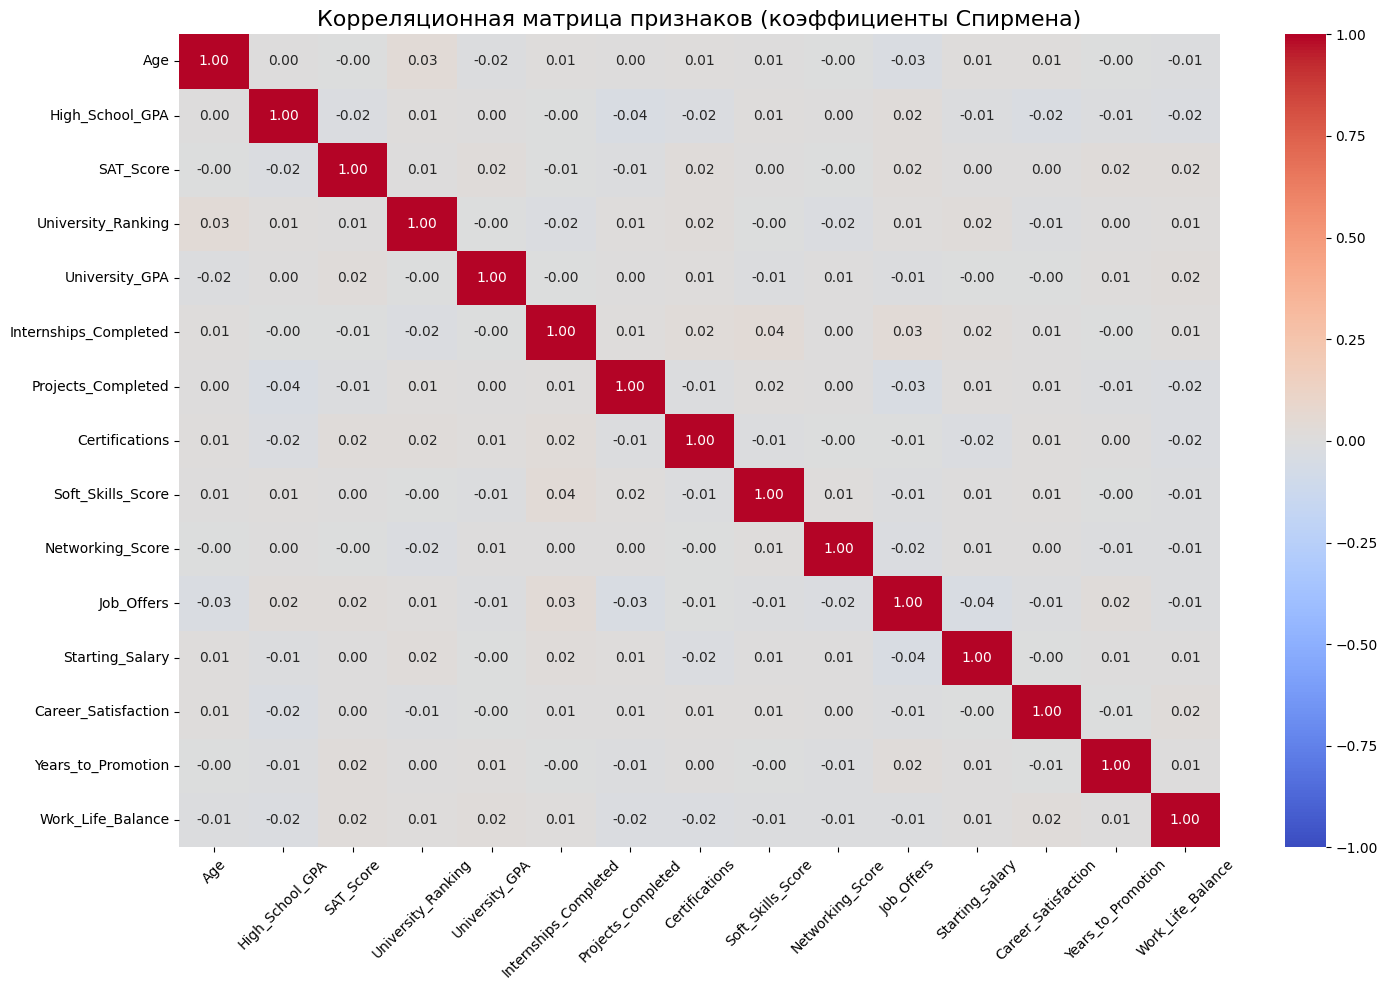

In [3]:
# Построим корреляционную матрицу по Спирмену, так как у нас нет нормального распределения признаков, чтобы в целом понимать, стоит ли дальше двигаться в строну
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем корреляционную матрицу по Спирмену (для числовых признаков)
correlation_matrix = df.corr(method='spearman', numeric_only=True)

# Строим тепловую карту с подписями значений корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Корреляционная матрица признаков (коэффициенты Спирмена)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
